<a href="https://colab.research.google.com/github/SteenaR/CognoRise_Internship/blob/main/CognoRise%5BTask1%5D_Cinema_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CINEMA TICKET SALES ANALYSIS AND PREDICTION

theatre.avif



**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
df = pd.read_csv('/content/cinemaTicket_Ref.csv')
df.head()

film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3        2    5  
4        2    5

In [ ]:
df.tail()

film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
142519       1569          495      1320000            22            0   
142520       1569          474      1200000            15            0   
142521       1569          524      1060000             8            0   
142522       1569          529       600000             5            0   
142523       1569          486       250000             5            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity  \
142519          2       3.86       60000.0          22  569.948187   
142520          1      65.22       80000.0          15   22.999080   
142521          3       9.20      132500.0           8   86.956522   
142522          2       5.00      120000.0           5  100.000000   
142523          1       1.79       50000.0           5  279.329609   

              date  month  quarter  day  
142519  2018-11-04     11        4    4  
142520  2018-11-04     11        4    4  
142521  2018-11-04     11        4    4  
142522  2018-11-04     11        4    4  
142523  2018-11-04     11        4    4

**Column Names**

In [ ]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

**Shape Of The Dataset**

In [ ]:
df.shape

(142524, 14)

**Informations Of The Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


**Statistical Discribtions**

In [ ]:
df.describe()

film_code    cinema_code   total_sales   tickets_sold  \
count  142524.000000  142524.000000  1.425240e+05  142524.000000   
mean     1518.985111     320.378427  1.234728e+07     140.137570   
std        36.184450     159.701229  3.065486e+07     279.758733   
min      1471.000000      32.000000  2.000000e+04       1.000000   
25%      1485.000000     181.000000  1.260000e+06      18.000000   
50%      1498.000000     324.000000  3.720000e+06      50.000000   
75%      1556.000000     474.000000  1.110000e+07     143.000000   
max      1589.000000     637.000000  1.262820e+09    8499.000000   

         tickets_out      show_time      occu_perc   ticket_price  \
count  142524.000000  142524.000000  142399.000000  142524.000000   
mean        0.237413       3.932103      19.965986   81234.599886   
std         2.923206       3.056276      22.653445   33236.599278   
min         0.000000       1.000000       0.000000     483.870968   
25%         0.000000       2.000000       3.750000   60000.000000   
50%         0.000000       3.000000      10.350000   79454.235185   
75%         0.000000       5.000000      28.210000  100000.000000   
max       311.000000      60.000000     147.500000  700000.000000   

          ticket_use       capacity          month        quarter  \
count  142524.000000  142399.000000  142524.000000  142524.000000   
mean      139.900157     854.723605       6.776852       2.634721   
std       279.564935     953.118103       2.195843       0.809692   
min      -219.000000      -2.000000       2.000000       1.000000   
25%        18.000000     276.994486       5.000000       2.000000   
50%        50.000000     525.714286       7.000000       3.000000   
75%       143.000000    1038.961039       9.000000       3.000000   
max      8499.000000    9692.097160      11.000000       4.000000   

                 day  
count  142524.000000  
mean       16.112585  
std         8.949471  
min         1.000000  
25%         8.000000  
50%        16.000000  
75%        24.000000  
max        31.000000

**Datatype Of Each Columns**

In [ ]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

**Checking Missing Values**

In [ ]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

**Handling Missing Values**

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

**Checking For Duplicate Values And Handling It**

In [ ]:
df.duplicated().sum()

104

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

0

**Extracting Weekend From The Date Column**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['Weekend'] = df['date'].dt.dayofweek
df.head()

film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity       date  month  quarter  \
0       4.26      150000.0          26  610.328638 2018-05-05      5        2   
1       8.08       80000.0          42  519.801980 2018-05-05      5        2   
2      20.00       80000.0          32  160.000000 2018-05-05      5        2   
3      11.01      100000.0          12  108.991826 2018-05-05      5        2   
4      16.67       80000.0          15   89.982004 2018-05-05      5        2   

   day  Weekend  
0    5        5  
1    5        5  
2    5        5  
3    5        5  
4    5        5

**Printing Unique Values**

In [ ]:
for i in df.columns:
  print(i,':',df[i].nunique())

film_code : 48
cinema_code : 244
total_sales : 9462
tickets_sold : 2231
tickets_out : 96
show_time : 51
occu_perc : 9311
ticket_price : 23232
ticket_use : 2282
capacity : 57361
date : 234
month : 10
quarter : 4
day : 31
Weekend : 7


**Data Visualization**

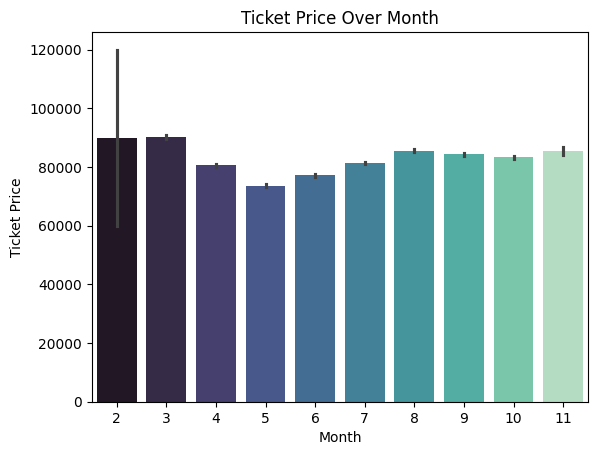

In [ ]:
sns.barplot(data = df,
            x = 'month',
            y = 'ticket_price',
            palette = 'mako')
plt.xlabel('Month')
plt.ylabel('Ticket Price')
plt.title('Ticket Price Over Month')
plt.show()

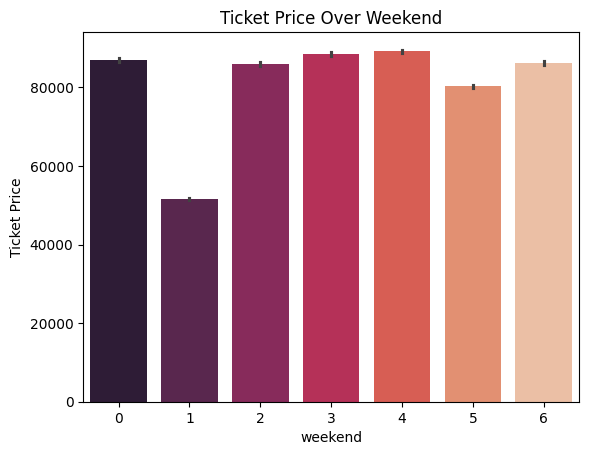

In [ ]:
sns.barplot(data = df,
            x = 'Weekend',
            y = 'ticket_price',
            palette = 'rocket')
plt.xlabel('weekend')
plt.ylabel('Ticket Price')
plt.title('Ticket Price Over Weekend')
plt.show()

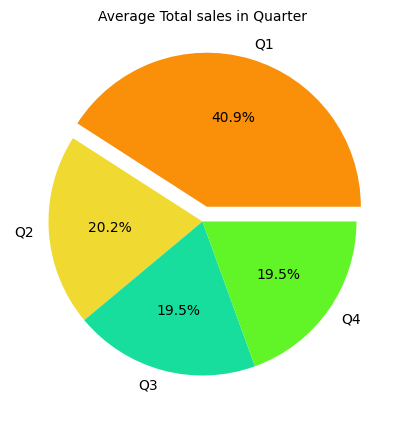

In [ ]:
explode = (0.1, 0, 0, 0)
label = ['Q1','Q2','Q3','Q4']
color = ['#FA8F0A','#F0DA32','#18DE9D','#61F527']
avg_totalsales = df.groupby('quarter') ['total_sales'].mean()

plt.figure(1, figsize=(10,5))
plt.pie(avg_totalsales, labels=label, colors = color, autopct='%1.1f%%', explode=explode)
plt.title("Average Total sales in Quarter", fontsize=10)
plt.show()

In [ ]:
avg_totalsales = df.groupby('month') ['total_sales'].mean()
lengends = {2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8: 'aug',9:'sep',10:'oct',11:'nov'}

fig = px.pie(df,
             values = avg_totalsales,
             names = lengends,
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole = .3,
             title = 'Average Total Sales in Month')
fig.show()


In [ ]:
fig = px.scatter(df,
                 x = 'tickets_sold',
                 y = 'total_sales',
                 color = 'tickets_out',
                 title = 'Total Sales vs Ticket Sold')
fig.show()

In [ ]:
fig = px.scatter(df,
                 x = 'ticket_price',
                 y = 'total_sales',
                 color = 'film_code',
                 title = 'Ticket Price vs Total Sales')
fig.show()

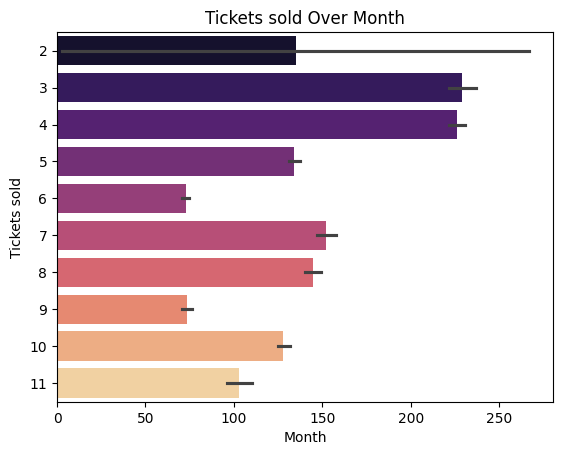

In [ ]:
sns.barplot(x = 'tickets_sold',
            y = 'month',
            data = df,
            orient = 'h',
            palette = 'magma')
plt.xlabel('Month')
plt.ylabel('Tickets sold')
plt.title('Tickets sold Over Month')
plt.show()

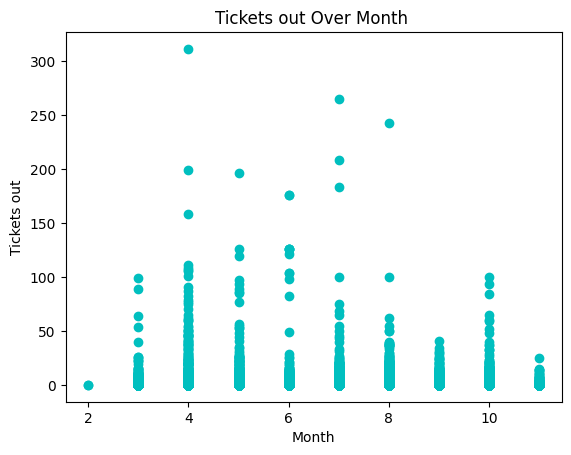

In [ ]:
plt.scatter(x = df['month'], y = df['tickets_out'], color = 'c')
plt.xlabel('Month')
plt.ylabel('Tickets out')
plt.title('Tickets out Over Month ')
plt.show()

<Axes: xlabel='total_sales', ylabel='Density'>

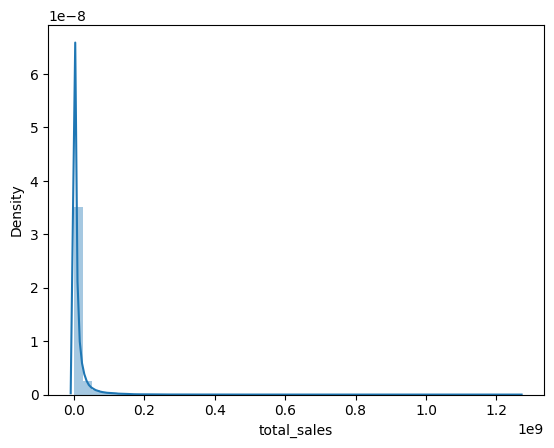

In [ ]:
sns.distplot(df['total_sales'])

**Checking Outliers In The dataset**

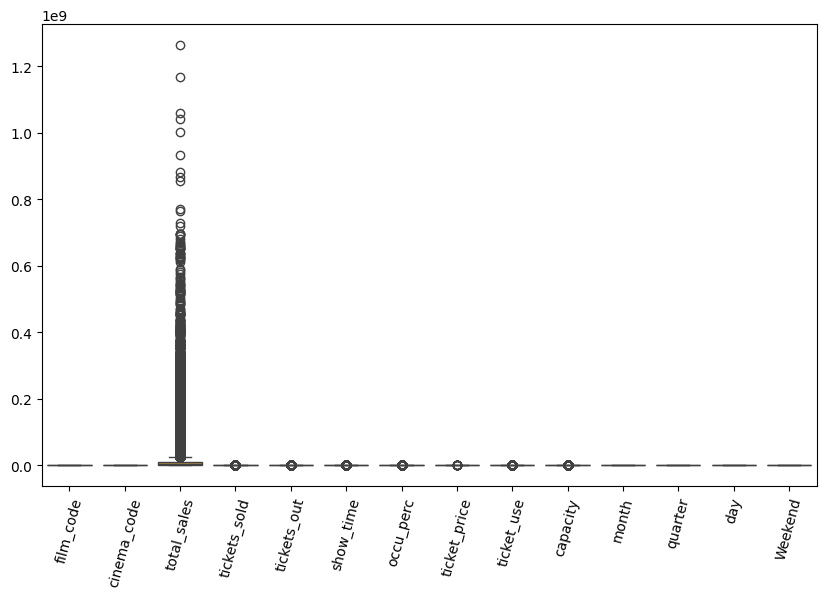

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.xticks(rotation=75)
plt.show()

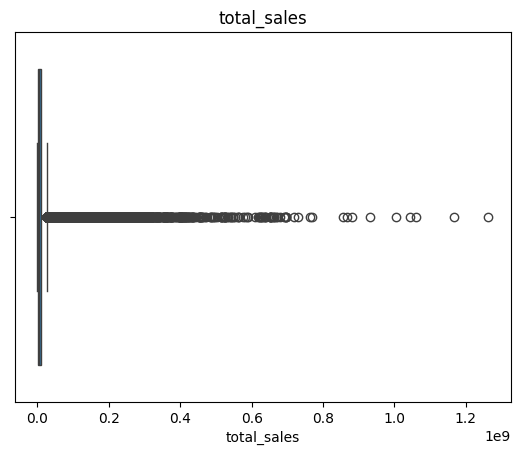

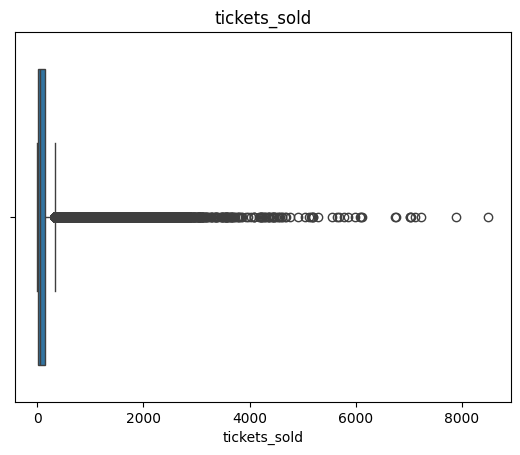

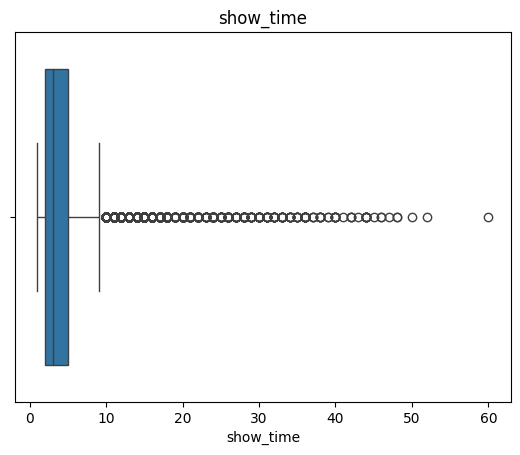

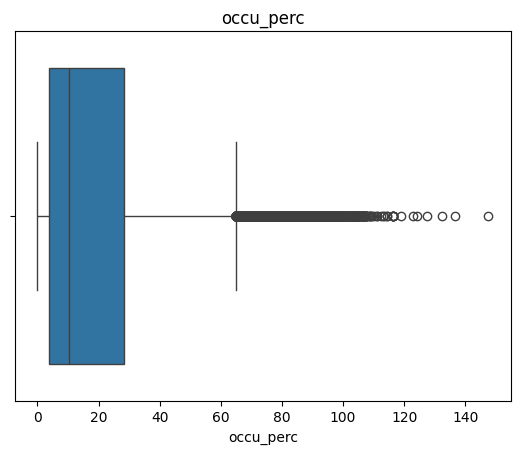

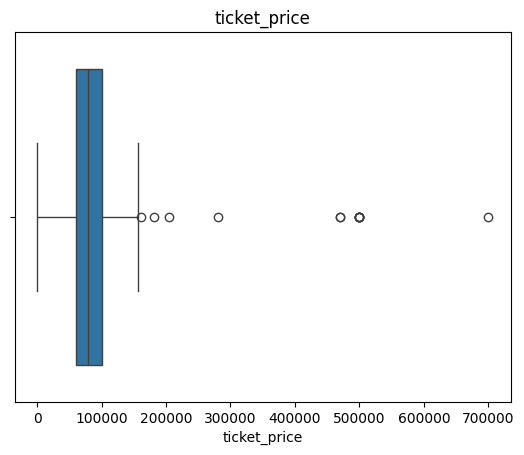

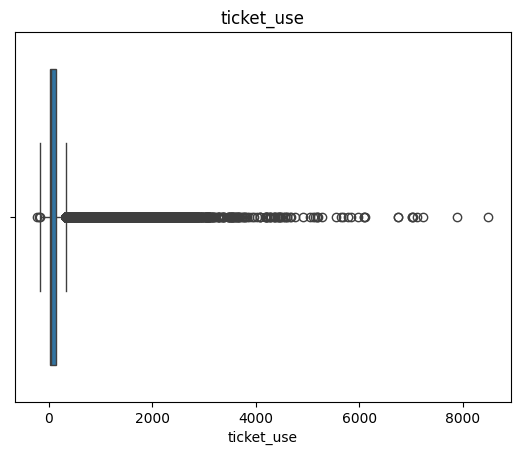

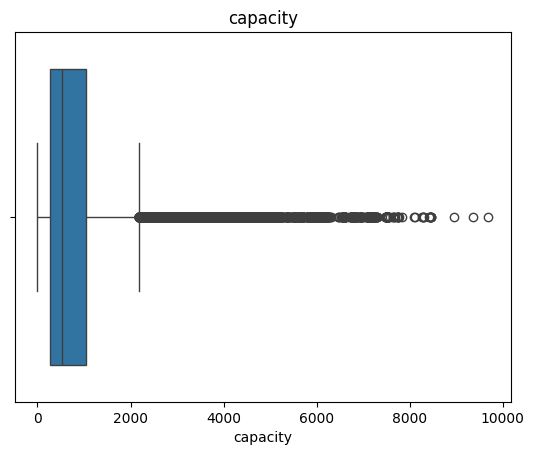

In [ ]:
no_outliers = ['film_code','cinema_code','month','day','quarter','Weekend','date','tickets_out']
for i in df.columns:
  if i not in no_outliers:
    sns.boxplot(x = df[i], data = df)
    plt.title(i)
    plt.show()

**Removing Outliers**

<Axes: >

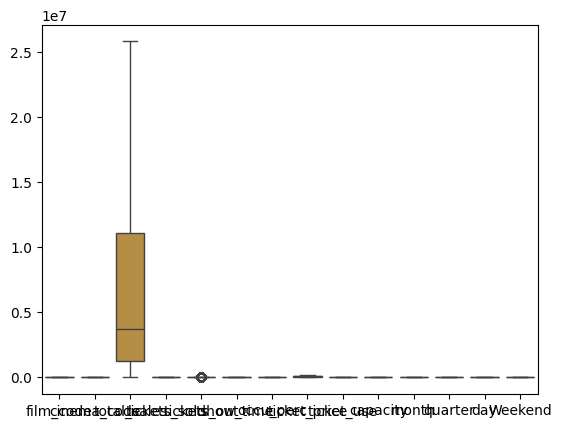

In [ ]:
for i in df.columns:
  if i not in no_outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[i] = np.where(df[i] < lower_limit, lower_limit, df[i])
    df[i] = np.where(df[i] > upper_limit, upper_limit, df[i])

sns.boxplot(df)

**Correlation Of The Data Using Heatmap**

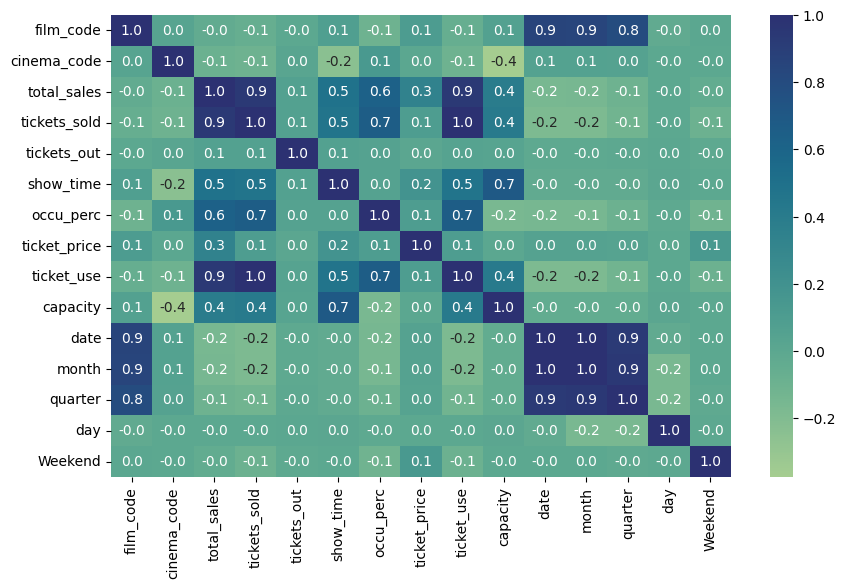

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() ,annot=True, fmt=".1f" , cmap="crest")
plt.show()

**Feature Selection**

In [ ]:
from sklearn.feature_selection import f_regression
from scipy.stats import f
X=df.drop(['total_sales','date'],axis = 1)
y=df['total_sales']
f_values,p_values = f_regression(X,y)
significant_feature = X.columns[p_values > 0.05]
print(significant_feature)

Index(['day'], dtype='object')


In [ ]:
x = df.drop(['total_sales','date','day'],axis = 1)
y = df['total_sales']

**Splitting Training And Testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

**Model Creation**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error,mean_absolute_error

model = [KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
model_name = ['KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost']

for i in model:
  print('MODEL :',i,"(",model_name[model.index(i)],")")
  print('_'*100)

  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)

  print('Evaluation Performance')
  print()
  print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
  print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
  print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,y_pred)))
  print('Mean Absolute Percentage Error :',mean_absolute_percentage_error(y_test,y_pred))
  print('R2 Score :',r2_score(y_test,y_pred))
  print('*'*100)
  print()

MODEL : KNeighborsRegressor() ( KNN )
____________________________________________________________________________________________________
Evaluation Performance

Mean Absolute Error : 822570.6978811624
Mean Squared Error : 3118524944502.7876
Root Mean Squared Error : 1765934.5810371311
Mean Absolute Percentage Error : 0.26735338936246644
R2 Score : 0.9572895165976948
****************************************************************************************************

MODEL : DecisionTreeRegressor() ( Decision Tree )
____________________________________________________________________________________________________
Evaluation Performance

Mean Absolute Error : 47810.7272918936
Mean Squared Error : 106314045907.09863
Root Mean Squared Error : 326058.3473967484
Mean Absolute Percentage Error : 0.004244595831275916
R2 Score : 0.9985439512673608
****************************************************************************************************

MODEL : RandomForestRegressor() ( Random Fo